In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
url = "https://raw.githubusercontent.com/shypotatosage/ALP_ML_Mimi_Evelyn/master/heart.csv"
df = pd.read_csv(url)

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Check isna Data 
(df.isna()).sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
# Check Empty Data 
(df == '').sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'].values)
df['ChestPainType'] = le.fit_transform(df['ChestPainType'].values)
df['RestingECG'] = le.fit_transform(df['RestingECG'].values)
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'].values)
df['ST_Slope'] = le.fit_transform(df['ST_Slope'].values)

df.head(n=10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


# Exploratory Data Analysis (Univariate)

In [14]:
# Dataset Description
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


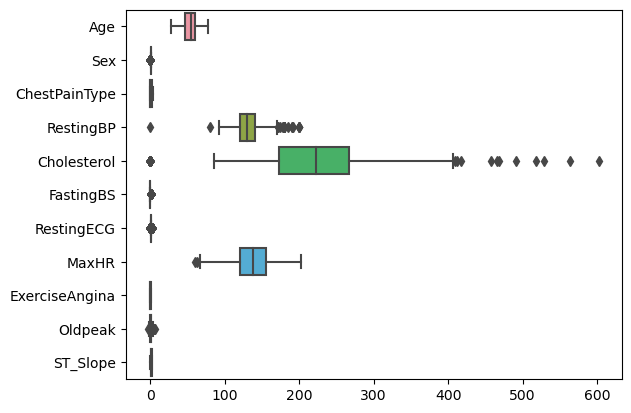

In [15]:
# Display Graphical Univariate EDA using box plot to analyze data distribution
sns.boxplot(data=df.drop(columns=['HeartDisease']), orient='h')
plt.show()

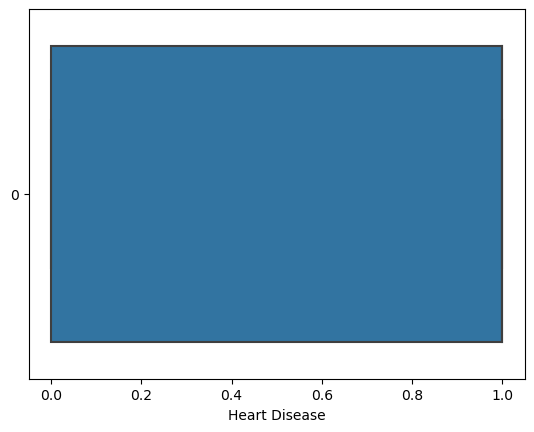

In [16]:
# Display a separate boxplot for 'HeartDisease' 
sns.boxplot(data=df["HeartDisease"],orient="h")
plt.xlabel('Heart Disease')
plt.show()

# Exploratory Data Analysis (Multivariate)

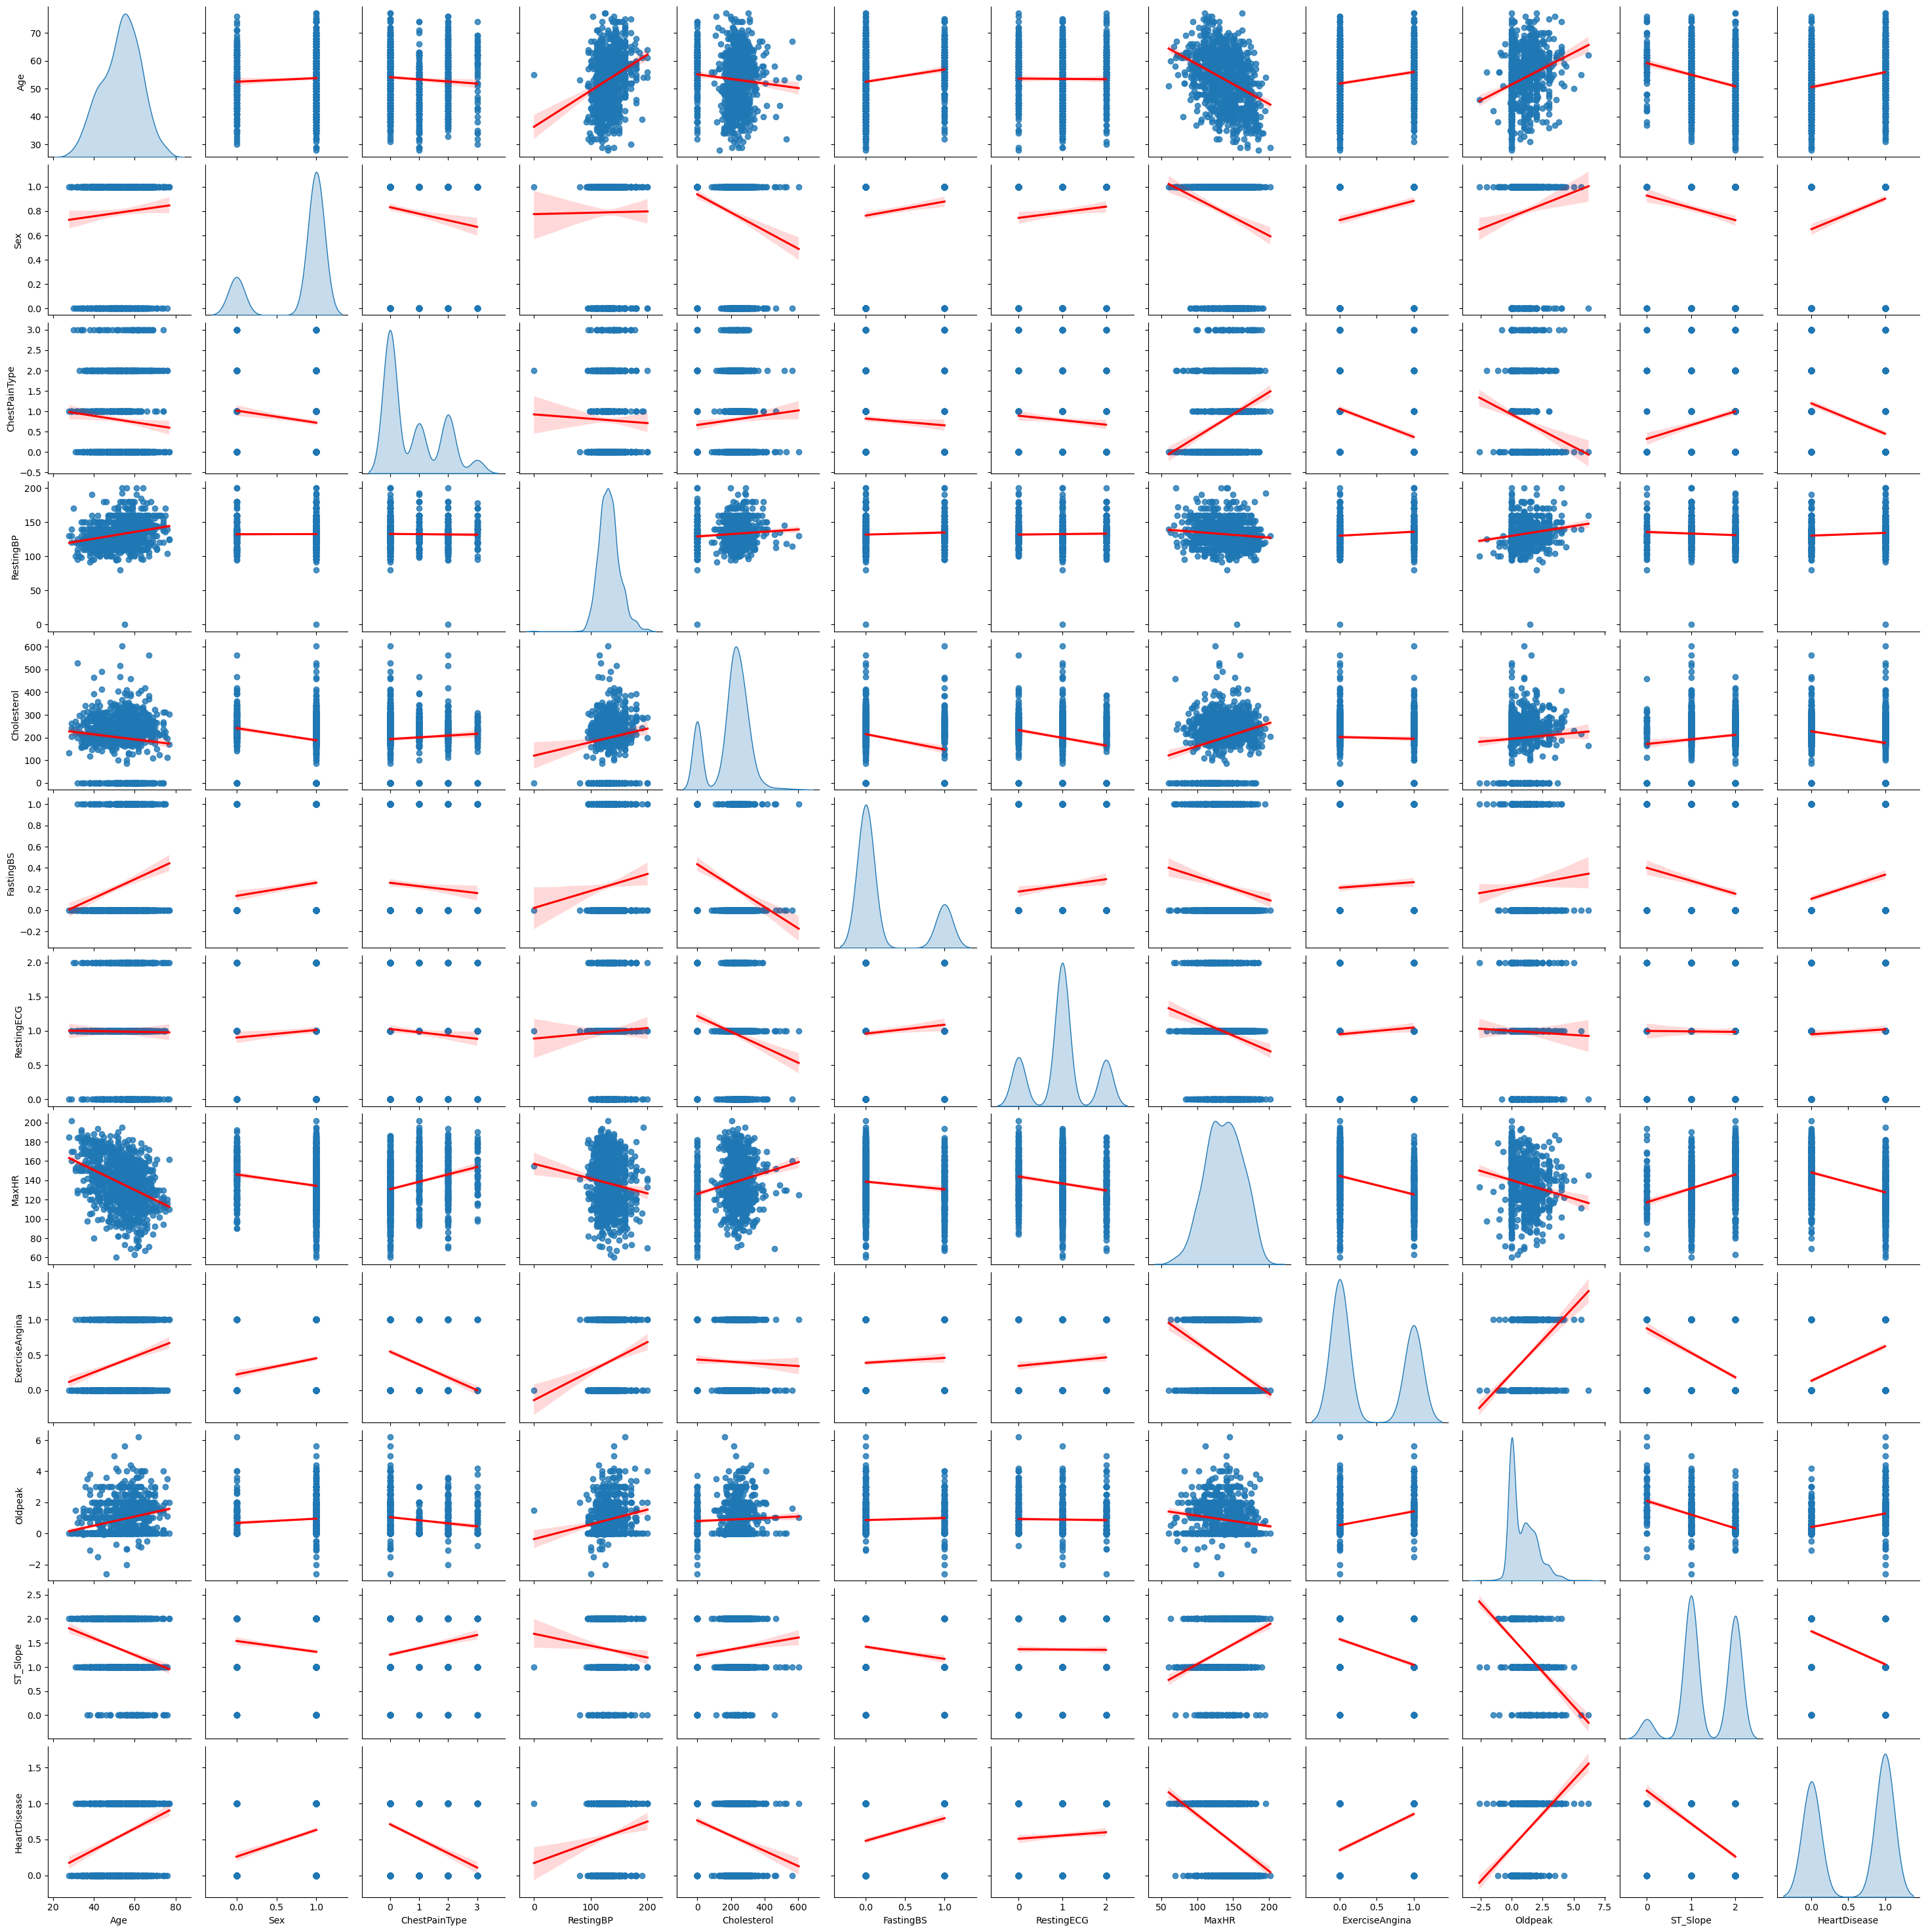

In [17]:
# Display the Multivariate EDA using pair plot
sns.pairplot(data=df, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.show()

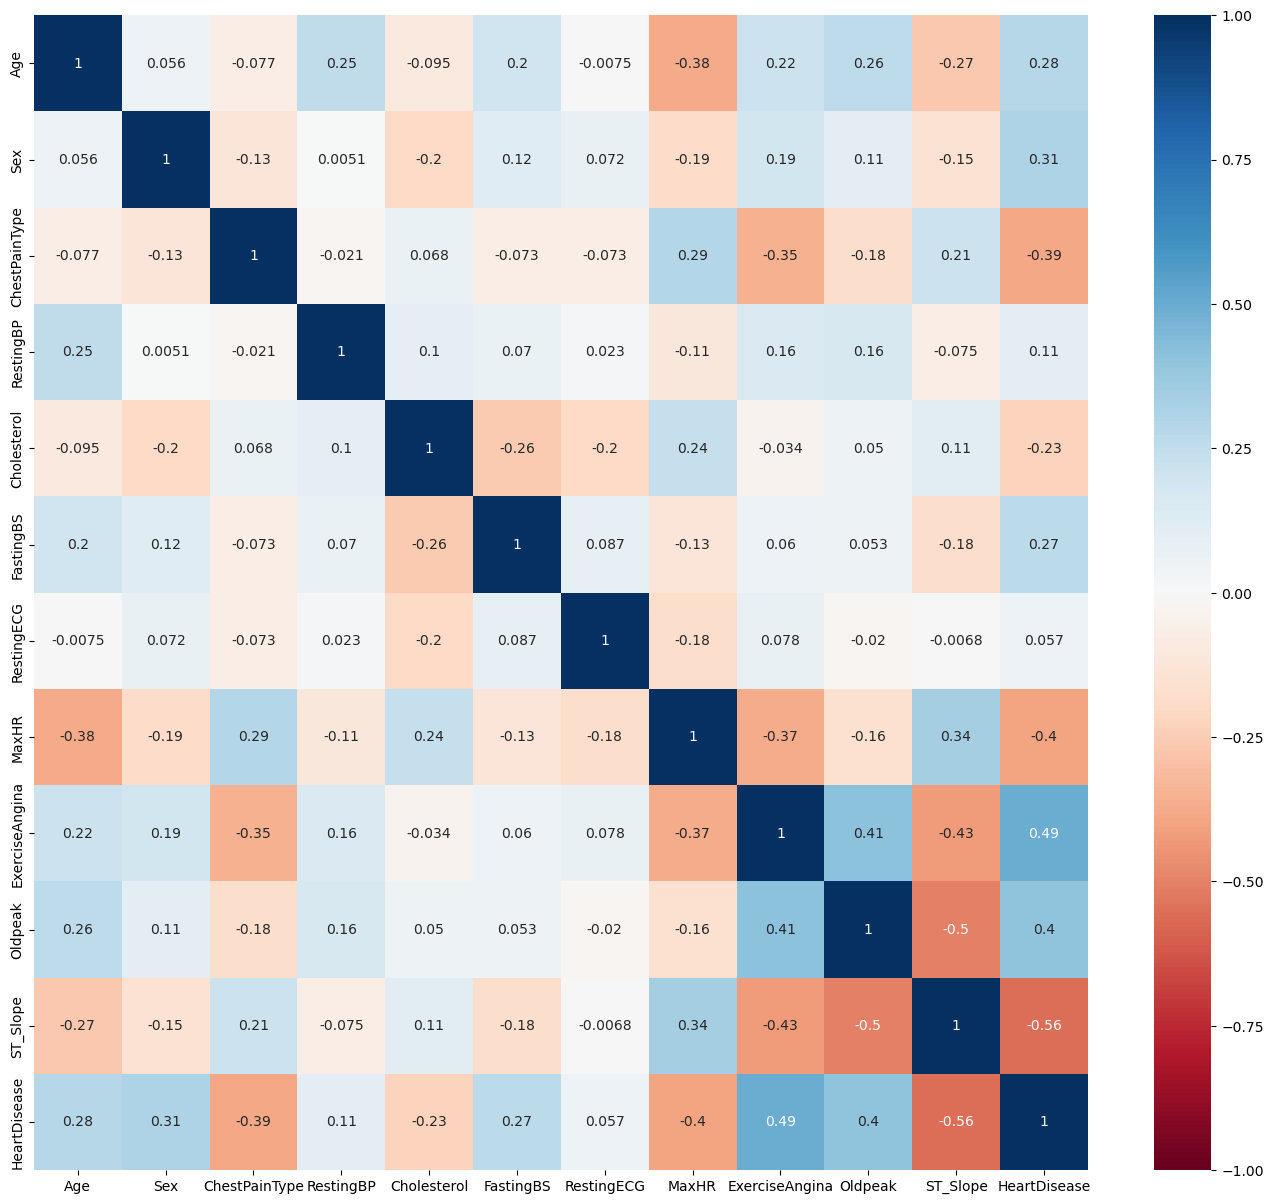

In [18]:
# Display the correlation strength and direction using heatmap
plt.subplots(figsize=(17,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="RdBu", annot=True)
plt.show()

# Split Dataset

In [6]:
# Asumsi X adalah kolom yang diletakkan dari kolom kiri, kecuali paling kanan
X = df.iloc[:, :-1].values

# Asumsi X adalah dependent variable paling kanan
y = df.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

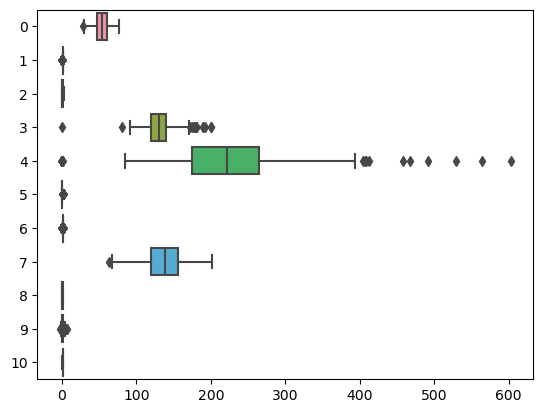

In [21]:
# Display EDA Before Scaling
sns.boxplot(data=X_train, orient='h')
plt.show()

In [8]:
#Standard Scaler need to be used when the scale are different
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

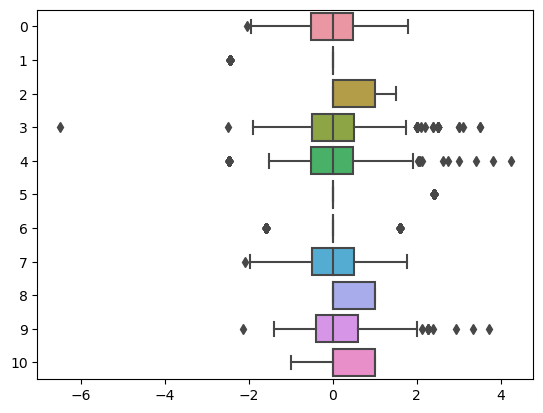

In [53]:
# Display EDA After Scaling
sns.boxplot(data=X_train, orient='h')
plt.show()

# Model Generation

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [31]:
# Make y prediction based on X test
y_pred = logreg.predict(X_test)
# Make a dataframe to display y_test and y_pred side-by-side
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Identifying TP, TN, FP, and FN
cmlogreg = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmlogreg)
# Display the accuracy score
accuracylogreg = accuracy_score (y_test, y_pred)
print("Accuracy Score: {:0.3f}". format (accuracylogreg))

Confusion Matrix
 [[59 18]
 [13 94]]
Accuracy Score: 0.832


In [34]:
from sklearn.metrics import log_loss
loglosslogreg = log_loss(y_test, logreg.predict_proba(X_test))
loglosslogreg
#the lower the better 
# Log Loss around "0.5" considered the classification model reasonable enough

0.388416631401129

## KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
#attempt at finding the best n neighbor value for euclidean using loop
# Define the range of n_ neighbors values
n_neighbors_values = range(1, 100)

# Create empty lists to store accuracy scores and n_ neighbors values
accuracy_scores = []
n_neighbors_values_list = []
highest_accuracy = 0.0

# Iterate over the n_ neighbors values
for n_neighbors in n_neighbors_values:
# Create the K-NN classifier
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors, metric = "euclidean", p=2)
    knnclass = classifier.fit(X_train, y_train)
# Make predictions on the test set
    y_pred = classifier.predict(X_test)
# Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
# Append accuracy score and n_neighbors value to the respective lists
    accuracy_scores.append(accuracy)
    n_neighbors_values_list.append(n_neighbors)
#find highest accuracy 
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        best_n_neighbors = n_neighbors

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\miche\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

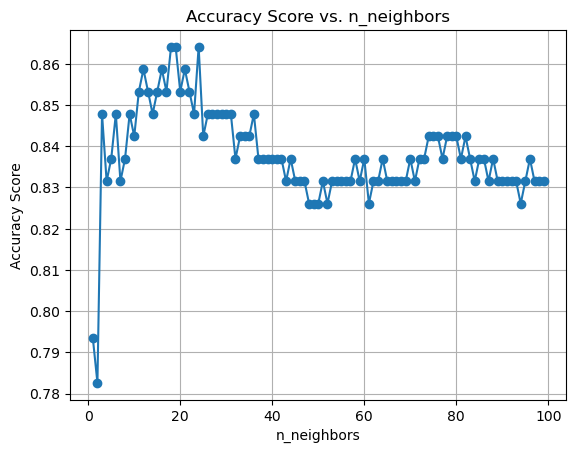

Highest Accuracy Score: 0.864 (n_neighbors=18)


In [39]:
# Create the plot
plt.plot(n_neighbors_values_list, accuracy_scores, marker='o') 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. n_neighbors')
plt.grid(True)
plt.show()
print ("Highest Accuracy Score: {:.3f} (n_neighbors={})".format(highest_accuracy, best_n_neighbors))

## Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
# Create an instance of the Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y_pred = rf_classifier.predict(X_test)
evaluate = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
evaluate.head(10)

,y_test,y_pred
0,1,1
1,0,1
2,1,1
3,1,1
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Identifying TP, TN, FP, and FN
cmrf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmrf)
# Display the accuracy score
accuracyrf = accuracy_score (y_test, y_pred) 
print("Accuracy Score: {:0.3f}". format (accuracyrf))

Confusion Matrix
 [[60 17]
 [12 95]]
Accuracy Score: 0.842


## SVM

In [9]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Identifying TP, TN, FP, and FN
cmrf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmrf)
# Display the accuracy score
accuracyrf = accuracy_score (y_test, y_pred) 
print("Accuracy Score: {:0.3f}". format (accuracyrf))

Confusion Matrix
 [[59 18]
 [13 94]]
Accuracy Score: 0.832


## Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Identifying TP, TN, FP, and FN
cmrf = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix\n", cmrf)
# Display the accuracy score
accuracyrf = accuracy_score (y_test, y_pred) 
print("Accuracy Score: {:0.3f}". format (accuracyrf))

Confusion Matrix
 [[61 16]
 [27 80]]
Accuracy Score: 0.766
